In [ ]:
""" Import packages
"""
# Utility
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import interpolate
from sklearn.model_selection import StratifiedGroupKFold
from Bio.SeqUtils.ProtParam import ProteinAnalysis



# !pip install levenshtein
from Levenshtein import distance
from itertools import combinations
from Levenshtein import distance as lev_distance
from sklearn.cluster import AgglomerativeClustering
from warnings import simplefilter
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ClusterWarning
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

In [ ]:
aligned_df = pd.read_csv("../data/AZ_aligned_mAb.txt", sep=" ", header=None, names=["Name", "Aligned_Sequence"])
aligned_df.head()

In [ ]:
#AZ data
df_AZ = pd.read_csv("../data/AZ_seq_vis.csv", delimiter = ",")
df_AZ['Name']='mAb'+df_AZ['mAb'].astype(str)
df_AZ

In [ ]:
# Merge on the 'Name' column
df_AZ = df_AZ.merge(aligned_df, on="Name", how="left")
df_AZ

In [6]:
## pairwise Levenshtein distance
distance_seq= np.zeros([len(df_AZ), len(df_AZ)])
for i, r1 in df_AZ.iterrows():
    for j, r2 in df_AZ.iterrows():
        if i>j:
            mabs_seq1= r1["Light Chain"]+r1["Heavy Chain"]
            mabs_seq2= r2["Light Chain"]+r2["Heavy Chain"]
            distance_seq[i, j]=distance(mabs_seq1, mabs_seq2)
            distance_seq[j, i]= distance_seq[i, j]
            

In [7]:
# Perform hierarchical clustering
Z = linkage(pdist(distance_seq), 'complete')

# Define the threshold for cutting the dendrogram
threshold =75

# Assign cluster labels to each data point
clusters = fcluster(Z, t=threshold, criterion='distance')

x=np.max(clusters)

In [8]:
#parental_mAbs_groups
for i in range(x):
    if np.sum(np.array(clusters==i, dtype=int))>1:
        print(i)
        print([list(df_AZ.Name)[x] for x in list(np.where(clusters==i)[0])])

1
['mAb98', 'mAb99', 'mAb100', 'mAb101']
4
['mAb105', 'mAb106', 'mAb108', 'mAb110', 'mAb111', 'mAb112', 'mAb113', 'mAb114', 'mAb115', 'mAb116', 'mAb117', 'mAb118', 'mAb119', 'mAb120', 'mAb121', 'mAb122', 'mAb123']
6
['mAb124', 'mAb125', 'mAb126', 'mAb140', 'mAb146']
7
['mAb90', 'mAb201', 'mAb202', 'mAb204', 'mAb205', 'mAb206', 'mAb208', 'mAb209', 'mAb211', 'mAb212']
8
['mAb130', 'mAb131', 'mAb133', 'mAb134', 'mAb135', 'mAb137']
13
['mAb29', 'mAb251', 'mAb252', 'mAb253', 'mAb254', 'mAb255', 'mAb256', 'mAb257', 'mAb258', 'mAb259', 'mAb260', 'mAb261']
14
['mAb82', 'mAb83']
21
['mAb76', 'mAb77', 'mAb78']
22
['mAb3', 'mAb81']
34
['mAb15', 'mAb16', 'mAb219']
35
['mAb72', 'mAb73']
49
['mAb88', 'mAb94']
51
['mAb87', 'mAb129']
52
['mAb144', 'mAb213']
53
['mAb102', 'mAb103', 'mAb104']
54
['mAb86', 'mAb162', 'mAb163', 'mAb164', 'mAb165', 'mAb166', 'mAb167', 'mAb168', 'mAb171', 'mAb173', 'mAb174', 'mAb175', 'mAb176', 'mAb177', 'mAb178', 'mAb214', 'mAb215', 'mAb216', 'mAb217', 'mAb218', 'mAb220']
5

In [9]:
df_AZ['clusters'] = clusters
df_AZ['clusters'].nunique()

102

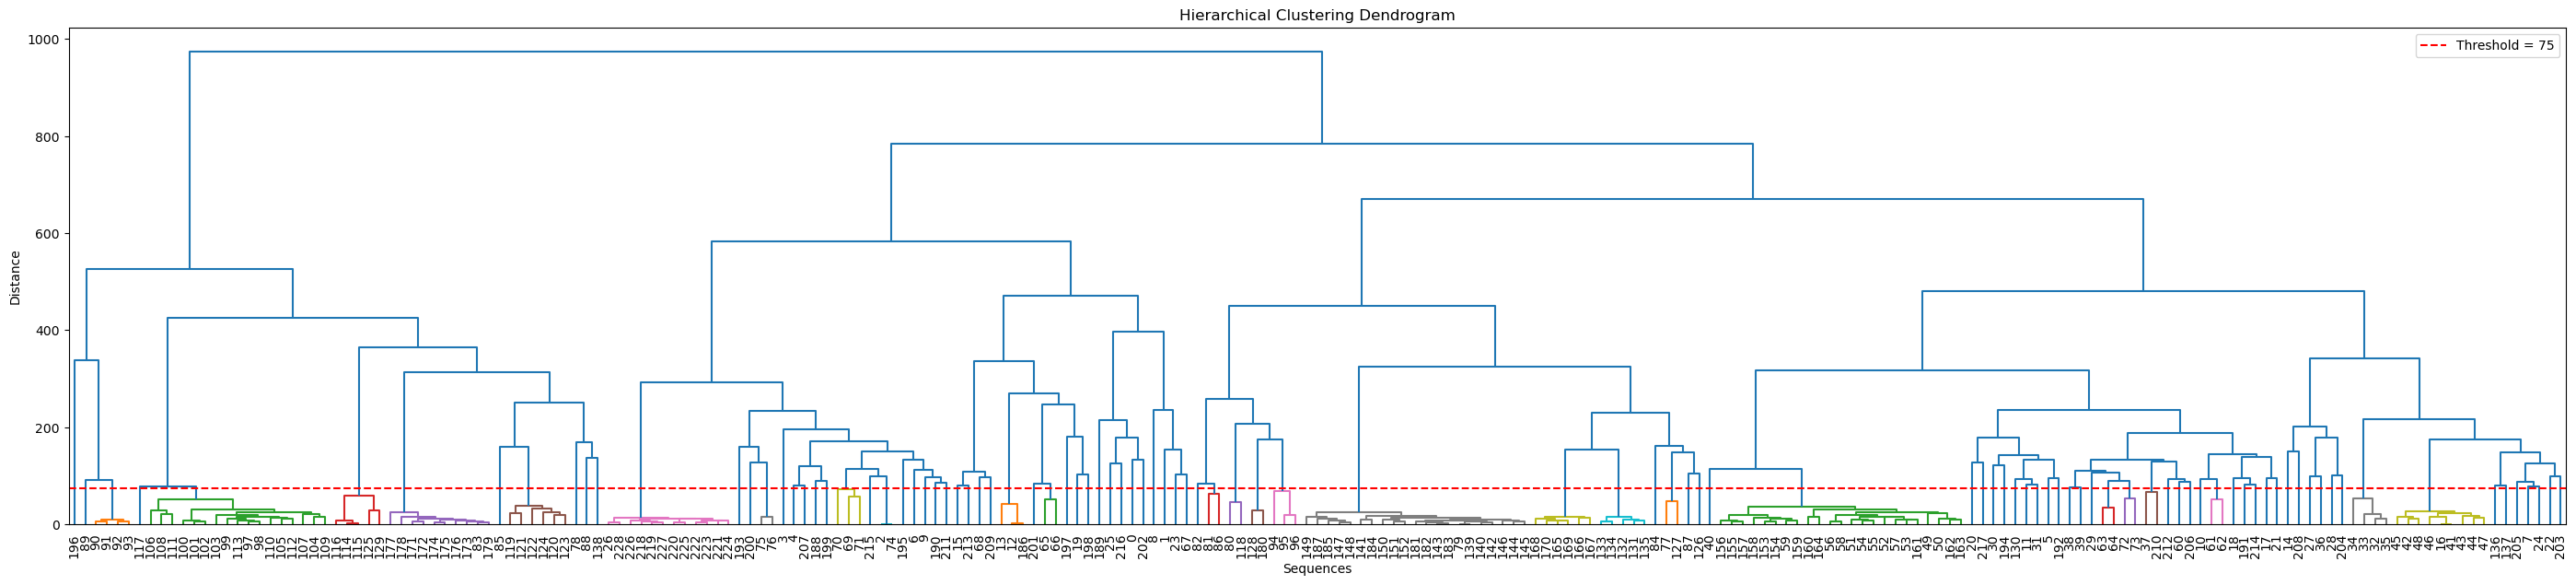

In [ ]:
plt.figure(figsize=(35, 7))
sch.dendrogram(Z, color_threshold=threshold)
plt.axhline(y=threshold, color='r', linestyle='--', label=f"Threshold = {threshold}")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sequences")
plt.ylabel("Distance")
plt.legend()
plt.xticks(fontsize = 10)
plt.show()

In [11]:
cluster_list = {}

for i in range(x):
    mAbs_in_cluster = [list(df_AZ.Name)[x] for x in np.where(clusters == i)[0]]
    if len(mAbs_in_cluster) > 1:
        cluster_list[i] = mAbs_in_cluster  # Add to dictionary
print(cluster_list)

{1: ['mAb98', 'mAb99', 'mAb100', 'mAb101'], 4: ['mAb105', 'mAb106', 'mAb108', 'mAb110', 'mAb111', 'mAb112', 'mAb113', 'mAb114', 'mAb115', 'mAb116', 'mAb117', 'mAb118', 'mAb119', 'mAb120', 'mAb121', 'mAb122', 'mAb123'], 6: ['mAb124', 'mAb125', 'mAb126', 'mAb140', 'mAb146'], 7: ['mAb90', 'mAb201', 'mAb202', 'mAb204', 'mAb205', 'mAb206', 'mAb208', 'mAb209', 'mAb211', 'mAb212'], 8: ['mAb130', 'mAb131', 'mAb133', 'mAb134', 'mAb135', 'mAb137'], 13: ['mAb29', 'mAb251', 'mAb252', 'mAb253', 'mAb254', 'mAb255', 'mAb256', 'mAb257', 'mAb258', 'mAb259', 'mAb260', 'mAb261'], 14: ['mAb82', 'mAb83'], 21: ['mAb76', 'mAb77', 'mAb78'], 22: ['mAb3', 'mAb81'], 34: ['mAb15', 'mAb16', 'mAb219'], 35: ['mAb72', 'mAb73'], 49: ['mAb88', 'mAb94'], 51: ['mAb87', 'mAb129'], 52: ['mAb144', 'mAb213'], 53: ['mAb102', 'mAb103', 'mAb104'], 54: ['mAb86', 'mAb162', 'mAb163', 'mAb164', 'mAb165', 'mAb166', 'mAb167', 'mAb168', 'mAb171', 'mAb173', 'mAb174', 'mAb175', 'mAb176', 'mAb177', 'mAb178', 'mAb214', 'mAb215', 'mAb216',

In [12]:
cluster_list_vis = {}

for i in range(x):
    indices = np.where(clusters == i)[0]  # Get indices of mAbs in cluster
    if len(indices) > 1:
        cluster_list_vis[i] = [(df_AZ.Name[j], df_AZ.ExpViscosity[j]) for j in indices]  # Store mAb and viscosity

print(cluster_list_vis)

{1: [('mAb98', 6.686048981), ('mAb99', 6.864522147), ('mAb100', 6.696672289), ('mAb101', 4.777579396)], 4: [('mAb105', 32.42505869), ('mAb106', 134.6453325), ('mAb108', 21.47469317), ('mAb110', 10.18966616), ('mAb111', 14.95755154), ('mAb112', 12.30237102), ('mAb113', 10.01422384), ('mAb114', 124.2433432), ('mAb115', 9.69082), ('mAb116', 27.00670546), ('mAb117', 24.83144305), ('mAb118', 58.53092967), ('mAb119', 87.25116915), ('mAb120', 1039.877321), ('mAb121', 329.9824936), ('mAb122', 12.11161828), ('mAb123', 53.4667378)], 6: [('mAb124', 95.74383907), ('mAb125', 44.33817834), ('mAb126', 18.79497675), ('mAb140', 16.24042286), ('mAb146', 21.57806653)], 7: [('mAb90', 34.24078878), ('mAb201', 17.86010214), ('mAb202', 29.98246007), ('mAb204', 73.45460827), ('mAb205', 35.820934), ('mAb206', 9.839598879), ('mAb208', 148.1265834), ('mAb209', 3035.582653), ('mAb211', 13.34297498), ('mAb212', 25.6138468)], 8: [('mAb130', 28.49741834), ('mAb131', 73.65666201), ('mAb133', 13.25007324), ('mAb134', 

In [13]:
cluster_comparisons = {}

for i, mAbs in cluster_list_vis.items():
    # Extract mAbs and viscosities in the cluster
    mAbs_list = [mAb for mAb, _ in mAbs]
    viscosities = [df_AZ.loc[df_AZ.Name == mAb, 'ExpViscosity'].values[0] for mAb in mAbs_list]

    # Identify reference mAb (highest viscosity)
    max_viscosity_index = viscosities.index(max(viscosities))
    reference_mAb = mAbs_list[max_viscosity_index]
    ref_HC = df_AZ.loc[df_AZ.Name == reference_mAb, 'Heavy Chain'].values[0]
    ref_LC = df_AZ.loc[df_AZ.Name == reference_mAb, 'Light Chain'].values[0]
    ref_HLC = df_AZ.loc[df_AZ.Name == reference_mAb, 'Aligned_Sequence'].values[0]
    

    # Compare all other mAbs in the cluster to the reference
    comparisons = []
    for mAb, _ in mAbs:
        if mAb == reference_mAb:
            continue  # Skip reference mAb itself

        hc_seq = df_AZ.loc[df_AZ.Name == mAb, 'Heavy Chain'].values[0]
        lc_seq = df_AZ.loc[df_AZ.Name == mAb, 'Light Chain'].values[0]
        hlc_seq = df_AZ.loc[df_AZ.Name == mAb, 'Aligned_Sequence'].values[0]
        viscosity = df_AZ.loc[df_AZ.Name == mAb, 'ExpViscosity'].values[0]

        hc_diff = lev_distance(ref_HC, hc_seq)  # Sequence difference (HC)
        lc_diff = lev_distance(ref_LC, lc_seq)  # Sequence difference (LC)
        hlc_diff = lev_distance(ref_HLC, hlc_seq)  # Sequence difference (HLC)
        
        comparisons.append({
            "mAb": mAb,
            "Viscosity": viscosity,
            #"HC_diff": hc_diff,
            #"LC_diff": lc_diff,
            "Seq_diff": hlc_diff
        })

    cluster_comparisons[i] = {
        "Reference_mAb": reference_mAb,
        "Reference_Viscosity": max(viscosities),
        "Comparisons": comparisons
    }

# Print or process _cluster_comparisons as needed
print(cluster_comparisons)


{1: {'Reference_mAb': 'mAb99', 'Reference_Viscosity': 6.864522147, 'Comparisons': [{'mAb': 'mAb98', 'Viscosity': 6.686048981, 'Seq_diff': 1}, {'mAb': 'mAb100', 'Viscosity': 6.696672289, 'Seq_diff': 2}, {'mAb': 'mAb101', 'Viscosity': 4.777579396, 'Seq_diff': 1}]}, 4: {'Reference_mAb': 'mAb120', 'Reference_Viscosity': 1039.877321, 'Comparisons': [{'mAb': 'mAb105', 'Viscosity': 32.42505869, 'Seq_diff': 1}, {'mAb': 'mAb106', 'Viscosity': 134.6453325, 'Seq_diff': 2}, {'mAb': 'mAb108', 'Viscosity': 21.47469317, 'Seq_diff': 3}, {'mAb': 'mAb110', 'Viscosity': 10.18966616, 'Seq_diff': 3}, {'mAb': 'mAb111', 'Viscosity': 14.95755154, 'Seq_diff': 3}, {'mAb': 'mAb112', 'Viscosity': 12.30237102, 'Seq_diff': 4}, {'mAb': 'mAb113', 'Viscosity': 10.01422384, 'Seq_diff': 5}, {'mAb': 'mAb114', 'Viscosity': 124.2433432, 'Seq_diff': 4}, {'mAb': 'mAb115', 'Viscosity': 9.69082, 'Seq_diff': 3}, {'mAb': 'mAb116', 'Viscosity': 27.00670546, 'Seq_diff': 6}, {'mAb': 'mAb117', 'Viscosity': 24.83144305, 'Seq_diff': 5

In [ ]:
import json

# Assuming 'cluster_comparisons' is your dictionary
with open('../data/cluster_comparisons.json', 'w') as json_file:
    json.dump(cluster_comparisons, json_file, indent=4)

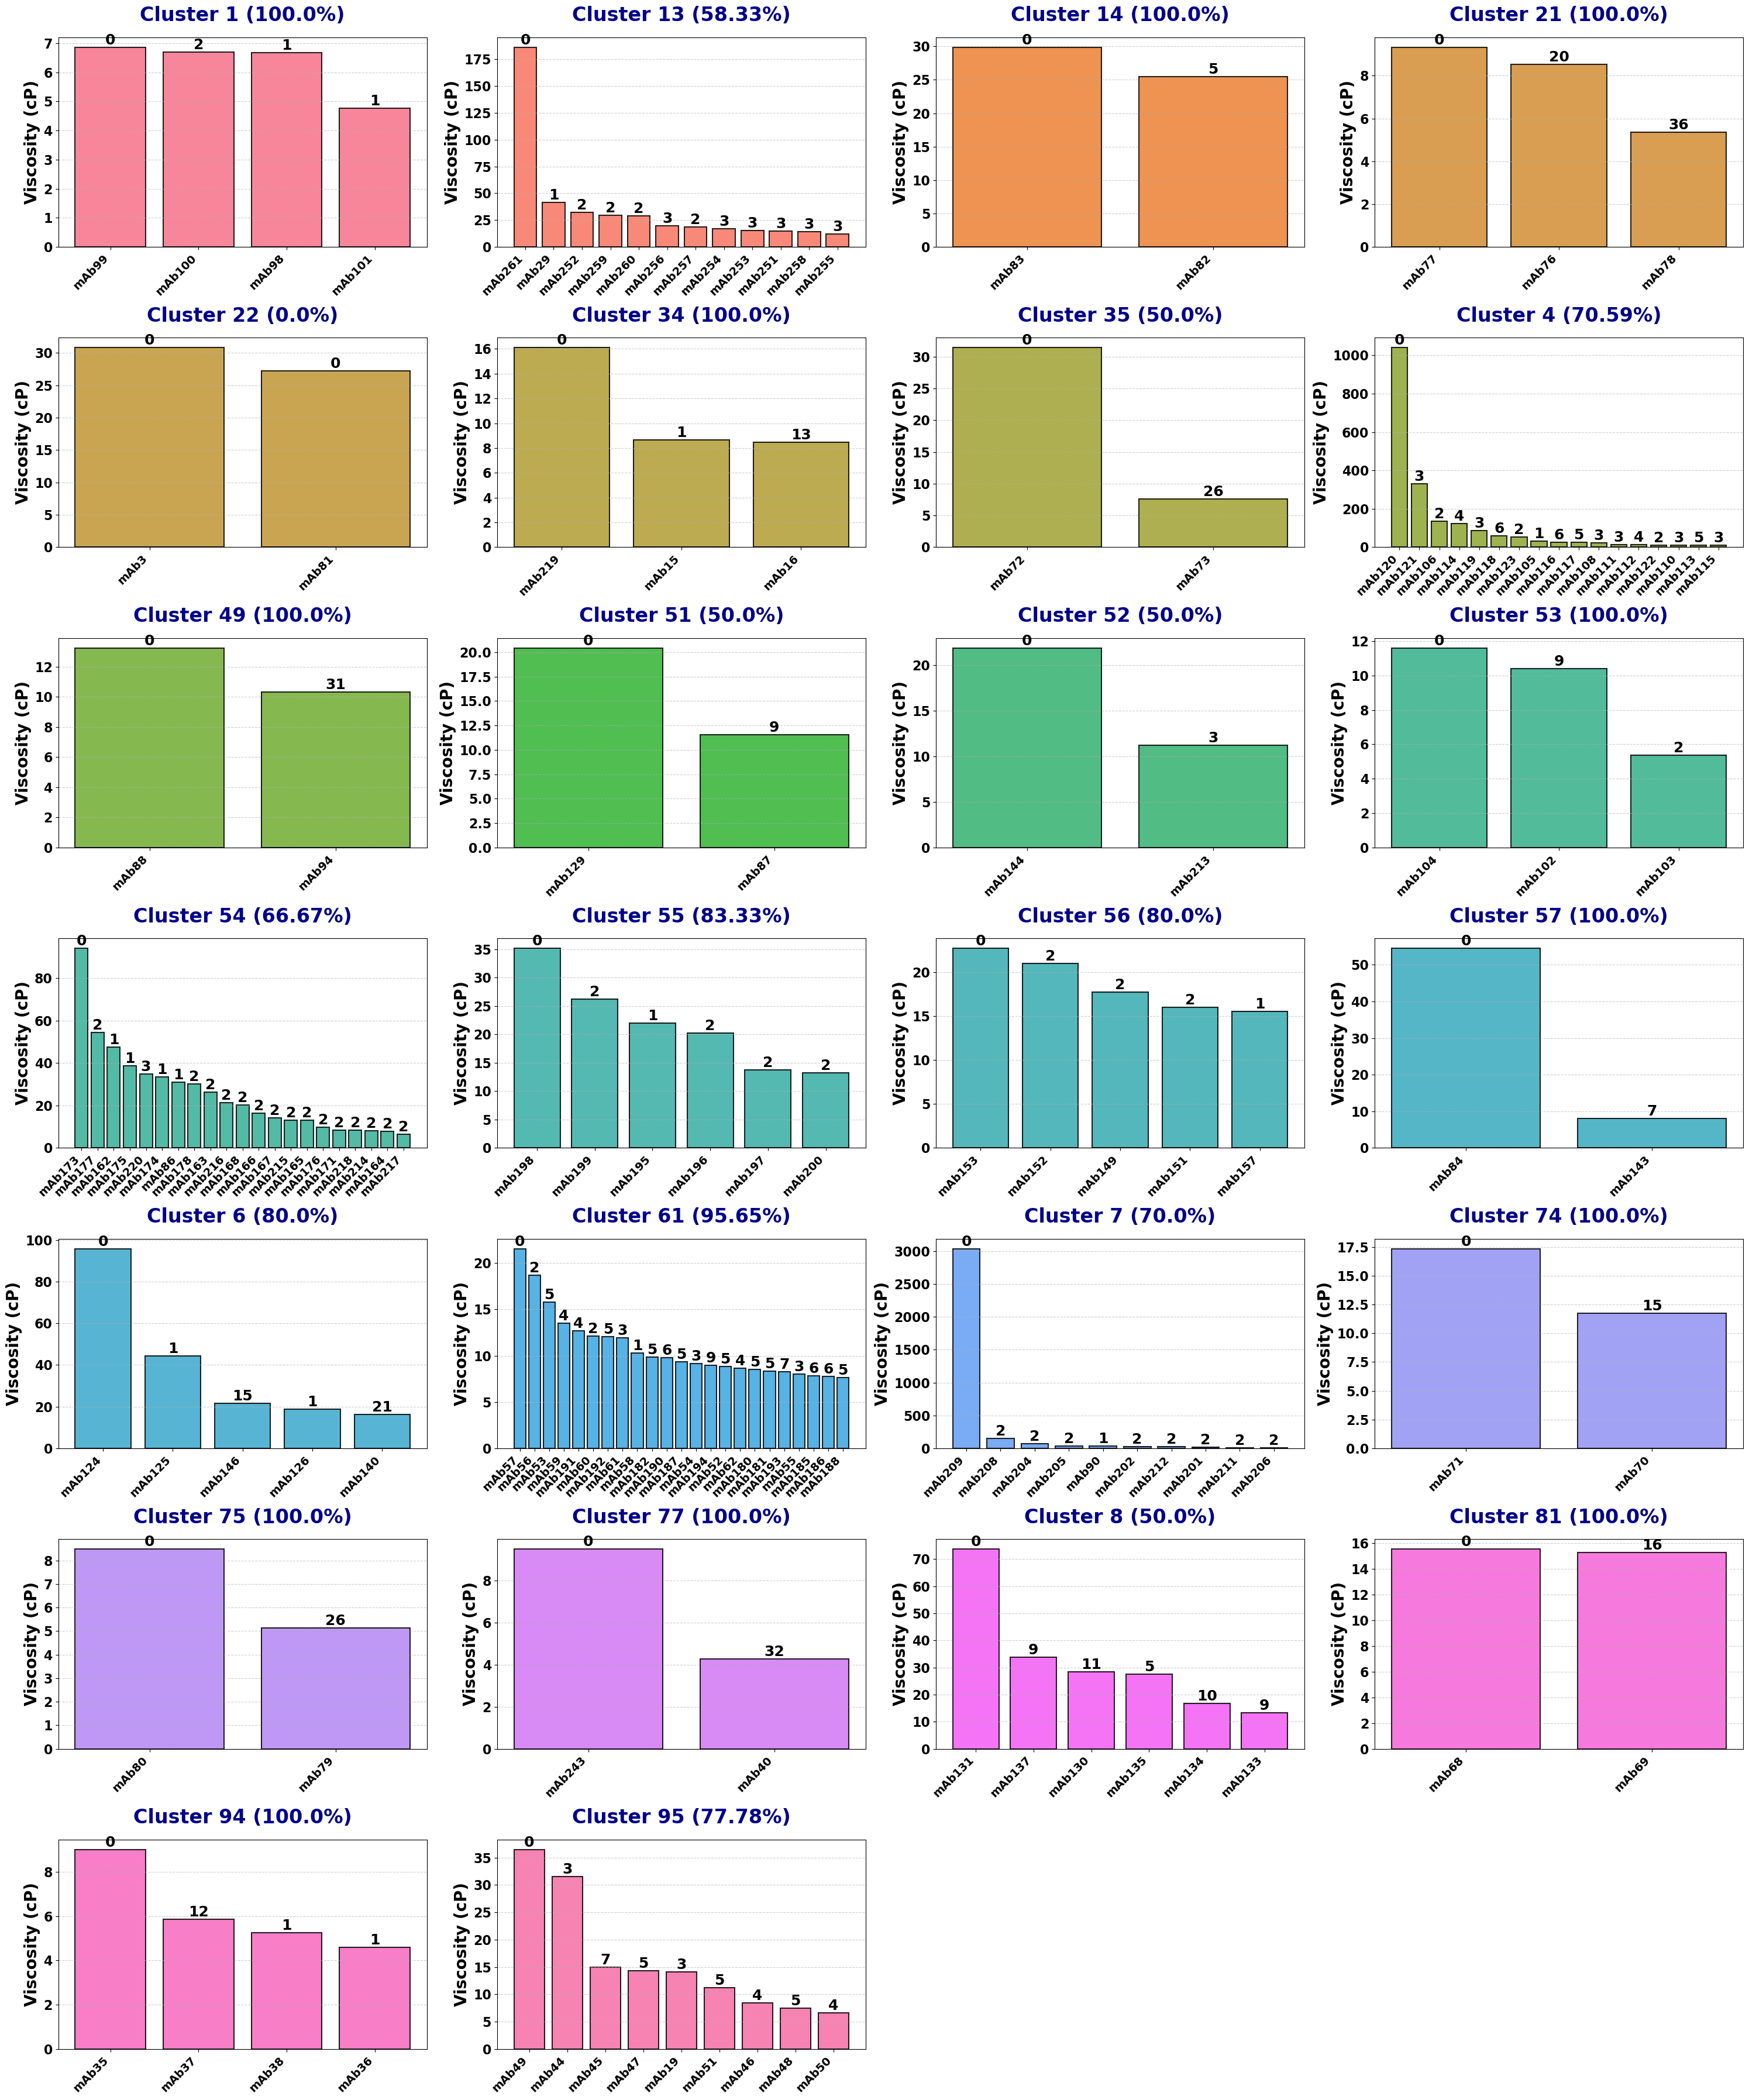

In [ ]:
# Load the data from the JSON file
with open('../data/cluster_comparisons.json', 'r') as json_file:
    data_dict = json.load(json_file)

# Convert to DataFrame
df_list = []
for cluster_id, cluster_data in data_dict.items():
    ref_mAb = cluster_data['Reference_mAb']
    ref_viscosity = cluster_data['Reference_Viscosity']
    deepviscosity_accuracy = cluster_data['DeepViscosity accuracy']
    df_list.append({'Cluster': cluster_id, 'mAb': ref_mAb, 'Viscosity': ref_viscosity, 'Seq_diff': 0, 'Accuracy': deepviscosity_accuracy})
    for comp in cluster_data['Comparisons']:
        df_list.append({'Cluster': cluster_id, 'mAb': comp['mAb'], 'Viscosity': comp['Viscosity'], 'Seq_diff': comp['Seq_diff'], 'Accuracy': deepviscosity_accuracy})

df = pd.DataFrame(df_list)

# Set up a 5x5 grid plus one additional row for the 26th cluster
num_clusters = df['Cluster'].nunique()
num_accuracies = df['Accuracy'].nunique()

rows = 7  # 5 rows + 1 additional row for the last subplot
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(30, 36))  # Increased figure size
axes = axes.flatten()  # Flatten axes for easy indexing

# Define color palette
colors = sns.color_palette("husl", num_clusters)

# Loop through each cluster and create a subplot
for idx, cluster_id in enumerate(sorted(df['Cluster'].unique())):
    ax = axes[idx]  # Get corresponding subplot
    cluster_df = df[df['Cluster'] == cluster_id].sort_values(by='Viscosity', ascending=False)
    deepvis_accuracy = cluster_df['Accuracy'].iloc[0]
    
    bars = ax.bar(cluster_df['mAb'], cluster_df['Viscosity'], color=colors[idx], alpha=0.85, edgecolor='black', linewidth=1.5)

    # Add sequence difference as text labels above bars
    for bar, seq_diff in zip(bars, cluster_df['Seq_diff']):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(seq_diff), 
                ha='center', va='bottom', fontsize=18, color='black', weight='bold')

    ax.set_title(f'Cluster {cluster_id} ({deepvis_accuracy}%)', fontsize=24, weight="bold", color='darkblue', pad=20)
    #ax.set_xlabel('mAb', fontsize=20, weight="bold")
    ax.set_ylabel('Viscosity (cP)', fontsize=20, weight="bold")

    ax.set_xticks(range(len(cluster_df['mAb'])))
    ax.set_xticklabels(cluster_df['mAb'], rotation=45, ha='right', fontsize=14, weight="bold")  # Rotate for readability

    #ax.tick_params(axis='y', labelsize=14)
    for label in ax.get_yticklabels():
        label.set_fontsize(16)  # Increase font size
        label.set_fontweight('bold')  # Make labels bold
    
    ax.grid(axis='y', linestyle='--', alpha=0.6)  # Add dashed grid lines for readability

# Remove unused subplots if there are fewer than 30 clusters
for i in range(num_clusters, len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=0.6, wspace=0.3)  # More spacing between plots
plt.tight_layout()
plt.savefig('cluster.tif', dpi=300, bbox_inches='tight')
plt.show()